In [27]:
function slowRecursion(n) {
    if (n <= 2) return n;
    return slowRecursion(n-1) + slowRecursion(n-2);
}

In [28]:
function memoMap(n) {
    const memo = new Map();
    return helperMM(n, memo);
}

function helperMM(n, memo) {
    if (n <= 2) return n;
    if (!memo.has(n)) {
        memo.set(n, helperMM(n-1, memo) + helperMM(n-2, memo));
    }
    return memo.get(n);
}

In [29]:
function memoArray(n) {
    const memo = [];
    return helperA(n, memo);
};

function helperA(n, memo) {
    if (n <= 2) return n;
    if (!memo[n]) {
        memo[n] = helperA(n-1, memo) + helperA(n-2, memo);
    }
    return memo[n];
}

In [30]:
function tabulation(n) {
    const tab = Array.from({ length: n + 1 });
    tab[1] = 1;
    tab[2] = 2;
    for (let i = 3; i <= n; i++) {
        tab[i] = tab[i-1] + tab[i-2];
    }
    return tab[n];
};

In [31]:
function tabFinal(n) {
    if (n === 1) return 1;
    if (n === 2) return 2;
    let nMinusTwo = 1;
    let nMinusOne = 2;
    let res = nMinusTwo + nMinusOne;
    for (let i = 3; i <= n; i++) {
        res = nMinusTwo + nMinusOne;
        nMinusTwo = nMinusOne;
        nMinusOne = res;
    }
    return res;
};

In [32]:
function timeIt(nbIterations, fn, ...args) {
    const times = [];
    for (let i = 0; i < nbIterations; i++) {
        const start = performance.now();
        fn(...args);
        times.push(performance.now() - start); 
    }
    return times.reduce((a,b) => a + b, 0)/nbIterations;
    
}

# THIS is a title

I forgot how this shit works lul

In [15]:
import * as Plot from "npm:@observablehq/plot";
import { document } from "jsr:@ry/jupyter-helper";

In [49]:
const d_slow = [];

for (let i = 1; i < 40; i++) {
    d_slow.push({ "n": i, "time (ms)": timeIt(5, slowRecursion, i) });
}

39

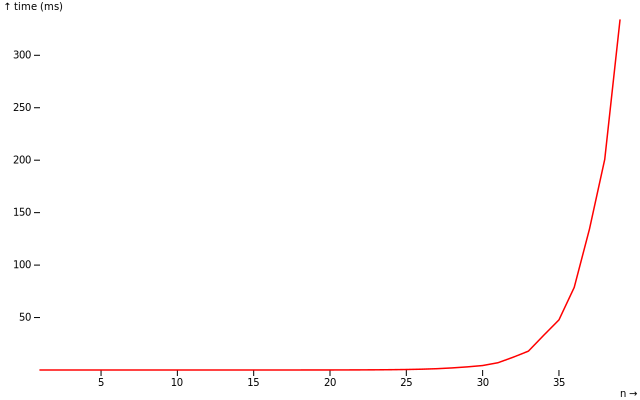

In [50]:
Plot.plot({
    marks: [
        Plot.lineY(d_slow, {x: "n", y: "time (ms)", stroke: "red"}),
    ],
    document,
})

In [53]:
const d_memoMap = [];
const d_memoArray = [];
const d_tabulation = [];
const d_tabFinal = [];

for (let i = 1; i < 1000; i++) {
    d_memoMap.push({ "n": i, "time (ms)": timeIt(5, memoMap, i) });
    d_memoArray.push({ "n": i, "time (ms)": timeIt(5, memoArray, i) });
    d_tabulation.push({ "n": i, "time (ms)": timeIt(5, tabulation, i) });
    d_tabFinal.push({ "n": i, "time (ms)": timeIt(5, tabFinal, i) });
}

999

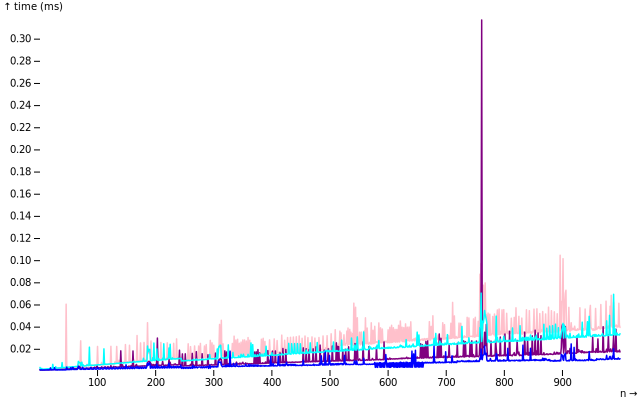

In [57]:
Plot.plot({
    marks: [
        Plot.lineY(d_memoMap, {x: "n", y: "time (ms)", stroke: "pink"}),
        Plot.lineY(d_memoArray, {x: "n", y: "time (ms)", stroke: "purple"}),
        Plot.lineY(d_tabulation, {x: "n", y: "time (ms)", stroke: "cyan"}),
        Plot.lineY(d_tabFinal, {x: "n", y: "time (ms)", stroke: "blue"})
    ],
    document,
})

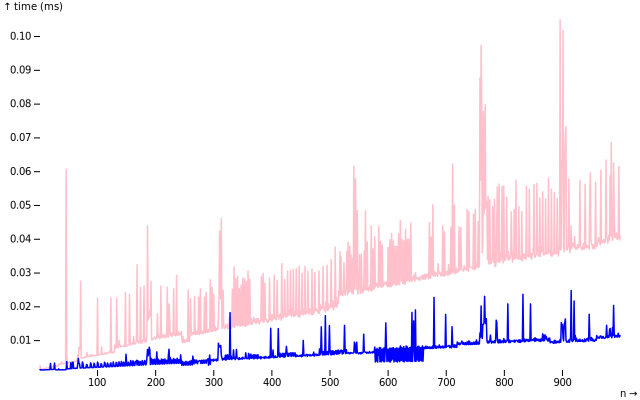

In [65]:
Plot.plot({
    marks: [
        Plot.lineY(d_memoMap, {x: "n", y: "time (ms)", stroke: "pink"}),
        Plot.lineY(d_tabFinal, {x: "n", y: "time (ms)", stroke: "blue"})
    ],
    document,
})

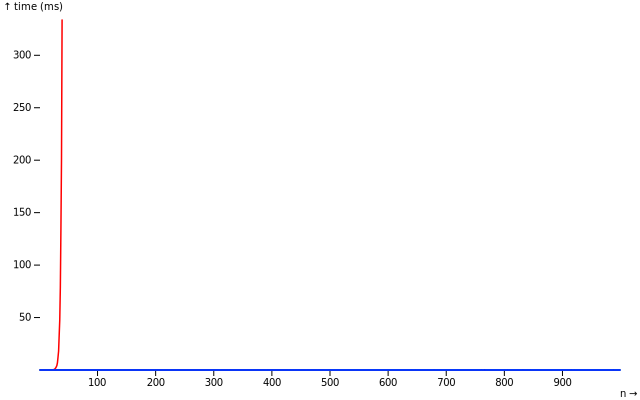

In [58]:
Plot.plot({
    marks: [
        Plot.lineY(d_slow, {x: "n", y: "time (ms)", stroke: "red"}),
        Plot.lineY(d_memoMap, {x: "n", y: "time (ms)", stroke: "pink"}),
        Plot.lineY(d_memoArray, {x: "n", y: "time (ms)", stroke: "purple"}),
        Plot.lineY(d_tabulation, {x: "n", y: "time (ms)", stroke: "cyan"}),
        Plot.lineY(d_tabFinal, {x: "n", y: "time (ms)", stroke: "blue"})
    ],
    document,
})

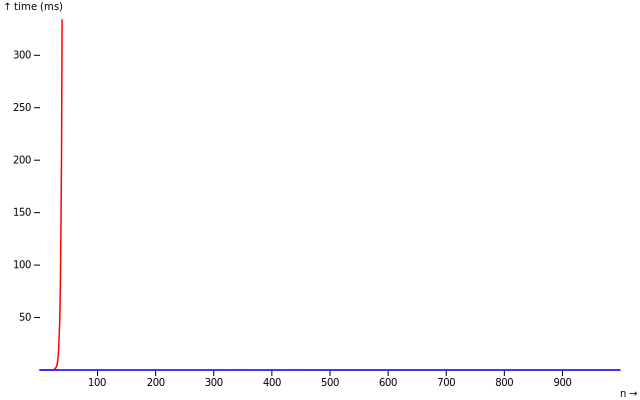

In [66]:
Plot.plot({
    marks: [
        Plot.lineY(d_slow, {x: "n", y: "time (ms)", stroke: "red"}),
        Plot.lineY(d_memoMap, {x: "n", y: "time (ms)", stroke: "pink"}),
        Plot.lineY(d_tabFinal, {x: "n", y: "time (ms)", stroke: "blue"})
    ],
    document,
})

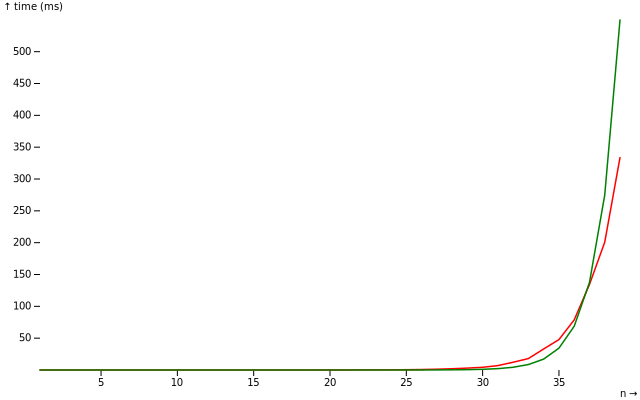

In [62]:
const d_2_pow_n = [];
for (let i = 1; i < 40; i++) {
    d_2_pow_n.push({ "n": i, "time (ms)": Math.pow(2, i)/1_000_000_000 });
}
Plot.plot({
    marks: [
        Plot.lineY(d_slow, {x: "n", y: "time (ms)", stroke: "red"}),
        Plot.lineY(d_2_pow_n, {x: "n", y: "time (ms)", stroke: "green"}),
    ],
    document,
})